Here we will study about the feature scaling in the data transformation process.
* Feature scaling is used to scale the data into the fixed range so that our model fetch the patterns easily and converge to the solution.
# Their are two type of scaling
* Standardization (also known as the mean centering or Z-score scaling)
* Normalization



In [2]:
import pandas as pd

In [3]:
df = pd.read_csv(r"/content/Social_Network_Ads.csv")

In [4]:
df.head(1)

,Age,EstimatedSalary,Purchased
0,19,19000,0


In [5]:
df.isnull().sum()

,0
Age,0
EstimatedSalary,0
Purchased,0


now we will apply the classification models for this data set before the scaling and check the accuracy and then we will apply the scaling and check the accuracy

In [6]:
x = df.drop(columns=["Purchased"])
y = df["Purchased"]

In [7]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [8]:


from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)
y_pred = knn.predict(x_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)
# printing the accuracy of the KNN model before the data scaling

0.825

In [9]:
# scaling the data set using the standard scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

Now we again train our model for KNN algo for our scaled data set

In [10]:
knn = KNeighborsClassifier()
knn.fit(x_train_scaled,y_train)
y_pred = knn.predict(x_test_scaled)
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9125

from the above practice we can see that after scaling our data set the accuracy of our model increased, because we bring the data into the same scale so it is easy for the model to converge into the solution

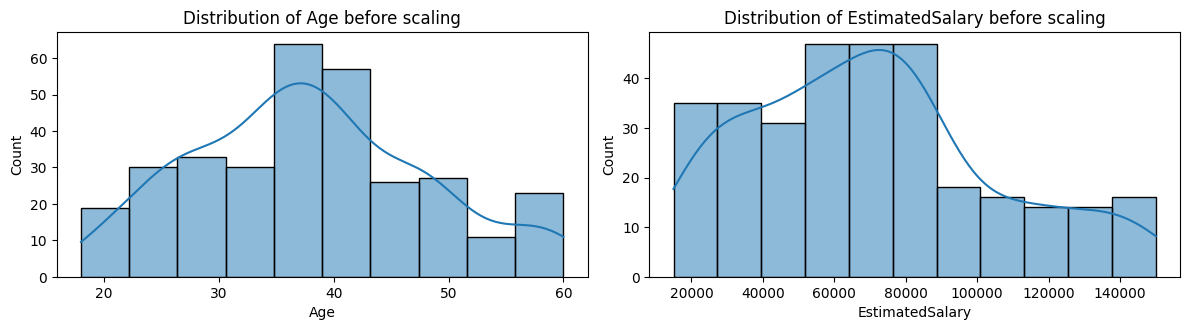

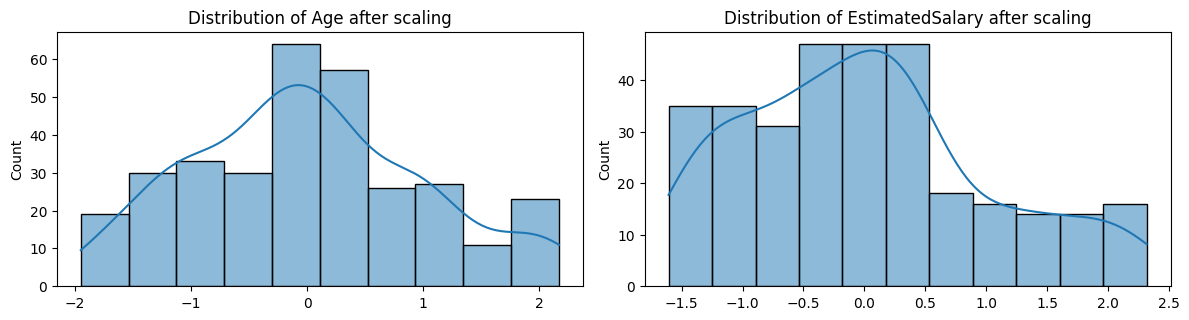

In [11]:
# prompt: show the distribution of the data before the scaling and after the scaling

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming x_train and x_train_scaled are defined as in the original code
# ... (previous code)

# Visualize the distribution before scaling
plt.figure(figsize=(12, 6))
for i, col in enumerate(x_train.columns):
    plt.subplot(2, 2, i + 1)
    sns.histplot(x_train[col], kde=True)
    plt.title(f'Distribution of {col} before scaling')
plt.tight_layout()
plt.show()


plt.figure(figsize=(12, 6))
for i, col in enumerate(x_train.columns):
    plt.subplot(2, 2, i + 1)
    sns.histplot(x_train_scaled[:, i], kde=True)
    plt.title(f'Distribution of {col} after scaling')
plt.tight_layout()
plt.show()

### Note
the above graph shows before scaling and after scaling, distribution remains the same just the data came into to the fixed range

# Normalization
* Min Max scaler
* Mean normalization
* Max Abs
* Robust scaling

In [12]:
x_train_1,x_test_1,y_train_1,y_test_1 = train_test_split(x,y,test_size=0.2,random_state=42)

In [13]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform(x_train_1)
x_test_scaled = scaler.transform(x_test_1)

In [14]:
knn1 = KNeighborsClassifier()
knn1.fit(x_train_scaled,y_train_1)
y_pred = knn1.predict(x_test_scaled)
from sklearn.metrics import accuracy_score
accuracy_score(y_test_1,y_pred)

0.925

This is how we have seen that the accuracy of the KNN model increased same by using the Min Max scaler


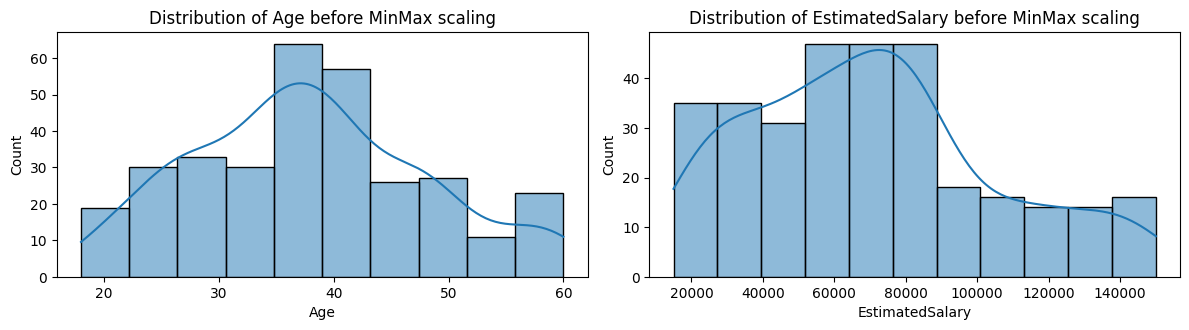

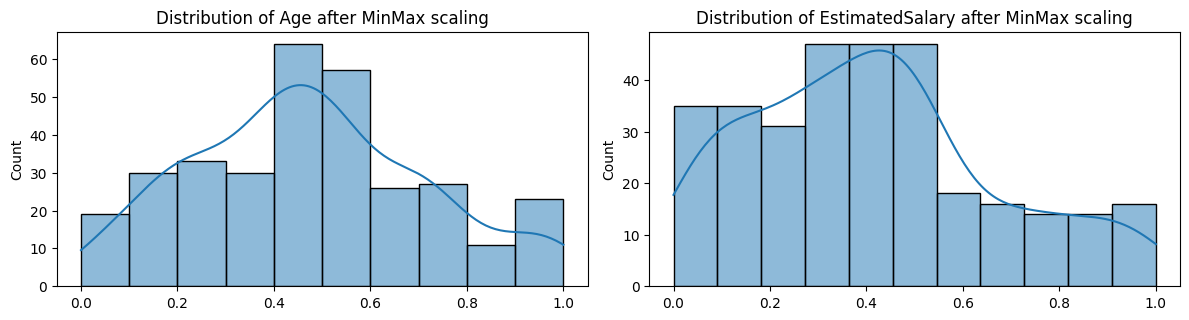

In [15]:

plt.figure(figsize=(12, 6))
for i, col in enumerate(x_train_1.columns):
    plt.subplot(2, 2, i + 1)
    sns.histplot(x_train_1[col], kde=True)
    plt.title(f'Distribution of {col} before MinMax scaling')
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
for i, col in enumerate(x_train_1.columns):
    plt.subplot(2, 2, i + 1)
    sns.histplot(x_train_scaled[:, i], kde=True)
    plt.title(f'Distribution of {col} after MinMax scaling')
plt.tight_layout()
plt.show()

The above graph shows that after the min max scaler our data come in between 0 and 1. which is the Min Max scaler

Same we can apply different types of the normalization based on our need. but mostly we used the Min Max Scaler